In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
dfx = pd.read_csv('./Training Data/Linear_X_Train.csv')
dfy = pd.read_csv('./Training Data/Linear_Y_Train.csv')

x = dfx.values
y = dfy.values

x = x.reshape((-1,))
y = y.reshape((-1,))
print(x.shape)
print(y.shape)

(3750,)
(3750,)


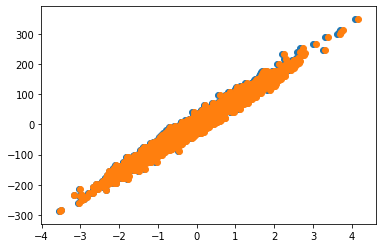

In [65]:
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()


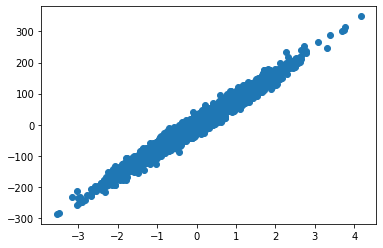

In [70]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x


def error(X,Y,theta):
    
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
        
    return error

def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad
    
#Algorithm
def gradientDescent(x,y,lr=.0001):
    theta=np.array([0.0,0.0])
    max_itr=100
    itr=0
    err_list=[]
    while(itr<=max_itr):
        grad=gradient(x,y,theta)
        e=error(x,y,theta)
        theta[0]=theta[0]-(lr*grad[0])
        theta[1]=theta[1]-(lr*grad[1])
        err_list.append(e)
        itr+=1
    return theta,err_list

print(y.min())

-286.9597390920343


In [71]:
final_theta, err_list = gradientDescent(X,Y)

[ 0.68386897 79.90573694]


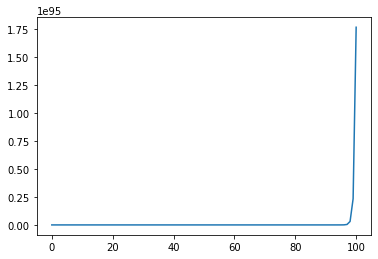

In [72]:
print(final_theta)
plt.plot(error_list)
plt.show()

In [73]:
print(final_theta)

[ 0.68386897 79.90573694]


In [74]:
### Plotting the line for testing data

test=pd.read_csv('./Testing Data/Linear_X_Test.csv')
test=test.values.reshape((-1,))
test
print(test)

[-1.87794441 -0.86903192 -2.53018242 ...  0.12800782 -0.27803759
 -0.68042543]


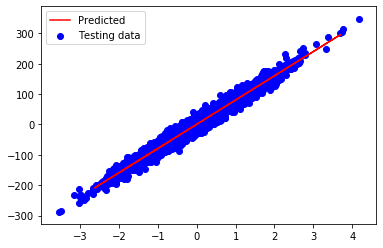

In [75]:
plt.plot(test,hypothesis(test,final_theta),color='red',label='Predicted')
plt.scatter(X,Y,color='blue',label='Testing data')
plt.legend()
plt.show()